In [383]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [384]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split

In [385]:
data=pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [386]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [387]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [388]:
data['Genre']=label_encoder.fit_transform(data['Genre'])
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [389]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [390]:
data.drop(['Genre'],axis=1,inplace=True)

In [391]:
X=data.drop(['Spending Score (1-100)'],axis=1)
y=data['Spending Score (1-100)']

In [392]:
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [393]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=100)

In [394]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(180, 2)
(180,)
(20, 2)
(20,)


In [395]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [396]:
rf_model=RandomForestRegressor(n_estimators=78,max_depth=8,random_state=90)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
y_pred

array([21.63247863, 48.19741817, 46.09357107, 43.94149764, 46.4672624 ,
       58.77060548, 51.69337669, 43.64117712, 51.75876207, 51.34322836,
       19.9472731 , 39.00117889, 30.03485958, 24.02718763, 70.86093631,
       26.09722222, 26.23824786, 71.45213369, 75.97153534, 81.15330501])

In [397]:
r2=r2_score(y_test,y_pred)
print('Accuracy of the random forest regressor model (R-Square value):',r2*100)

Accuracy of the random forest regressor model (R-Square value): 75.21515368810796


LITE GBM

In [398]:
import lightgbm as gbm

In [399]:
gbm_model=gbm.LGBMRegressor(n_estimator=700,random_state=200)

In [400]:
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=.1, train_size=.9, random_state=150)
parameters = {
    'num_leaves': 290,
    'learning_rate': 0.09,
    'verbose':-1
}
Ds=gbm.Dataset(x_train,label=y_train)
gbm_model=gbm.train(parameters,Ds,num_boost_round=750)
y_pred=gbm_model.predict(x_test)

In [401]:
r3=r2_score(y_test,y_pred)
print('Accuracy of the GBM model (R-Square value):',r3*100)

Accuracy of the GBM model (R-Square value): 72.2386817236756


CAT BOOST

In [402]:
import catboost as cb

In [459]:
cb_model = cb.CatBoostRegressor(iterations=950,  
                              learning_rate=0.02,
                              verbose=0) 
cb_model.fit(x_train, y_train)
y_pred=cb_model.predict(x_test)

In [460]:
r4=r2_score(y_test,y_pred)
print('Accuracy of the catboost (R-Square value):',r4*100)

Accuracy of the catboost (R-Square value): 72.82864439281369


GRADIENT BOOST

In [405]:
from sklearn.ensemble import GradientBoostingRegressor

In [493]:
gb_model = GradientBoostingRegressor(n_estimators=900,
                                   learning_rate=0.03,  
                                   max_depth=10   
                                   )
gb_model.fit(x_train, y_train)
y_pred=gb_model.predict(x_test)

In [494]:
r5=r2_score(y_test,y_pred)
print('Accuracy of the gradientboost (R-Square value):',r5*100)

Accuracy of the gradientboost (R-Square value): 73.19029769063442


XGB

In [408]:
import xgboost as xg

In [410]:
dtrain = xg.DMatrix(x_train, label=y_train)
dtest = xg.DMatrix(x_test, label=y_test)

In [589]:
params = {
    'max_depth':4,
    'learning_rate': 0.02,          
}

In [596]:
XGB_model = xg.train(params, dtrain, num_boost_round=250)
y_pred=XGB_model.predict(dtest)

In [597]:
r6=r2_score(y_test,y_pred)
print('Accuracy of the xgboost (R-Square value):',r6*100)

Accuracy of the xgboost (R-Square value): 70.13415489998009


In [598]:
import pandas as pd

data = {
    'Algorithms': [
        'RandomForestClassifier',
        'Lite GBM',
        'Cat boost',
        'Gradient boost',
        'Xg boost'
    ],
    'Accuracy': [
        r2,
        r3,
        r4,
        r5,
        r6
    ]
}

output = pd.DataFrame(data, columns=['Algorithms', 'Accuracy'],index=[1,2,3,4,5])
print(output)

               Algorithms  Accuracy
1  RandomForestClassifier  0.752152
2                Lite GBM  0.722387
3               Cat boost  0.728286
4          Gradient boost  0.731903
5                Xg boost  0.701342


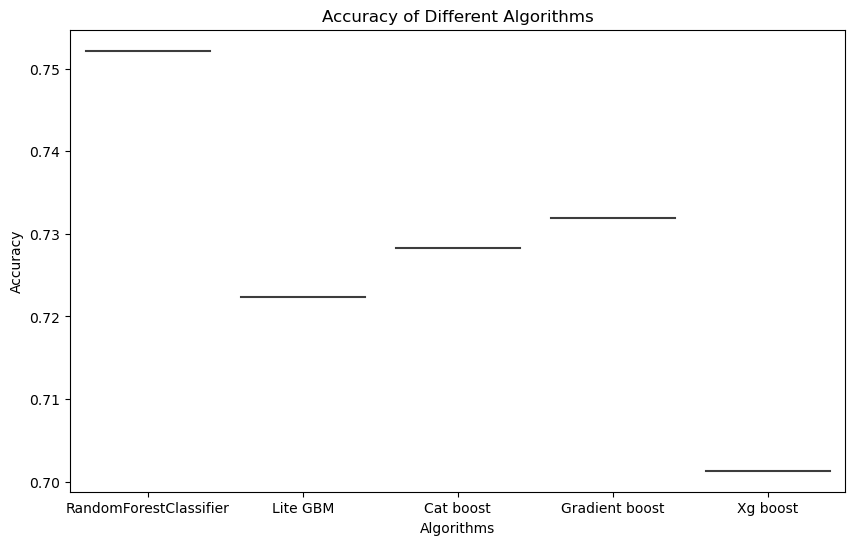

In [607]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(x='Algorithms', y='Accuracy', data=output)

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')


plt.show()